Raul Jimenez 19017
Bryann Alfaro 19372
Donaldo Garcia 19683

Laboratorio 4 

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
import itertools
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from os import listdir
import os

%matplotlib inline

In [71]:
df = pd.read_csv('malware_dataset.csv')
df.head()

,.rsrc,.rsrcvAddress,.rsrcvSize,.rsrcrSize,KERNEL32.DLL,MSVCRT.dll,SHELL32.dll,USER32.dll,WS2_32.dll,htons,...,shutdown,htonl,ntohl,select,WSACleanup,WSAGetLastError,PSAPI.DLL,listen,bind,accept
0,True,16384.0,124.0,512.0,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,True,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,True,16384.0,128.0,512.0,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,True,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,16384.0,124.0,512.0,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploracion

In [72]:
df.shape

(40, 45)

In [73]:
df.keys()

Index(['.rsrc', '.rsrcvAddress', '.rsrcvSize', '.rsrcrSize', 'KERNEL32.DLL',
       'MSVCRT.dll', 'SHELL32.dll', 'USER32.dll', 'WS2_32.dll', 'htons',
       'connect', 'socket', 'WSAStartup', 'send', 'inet_addr', 'recv',
       'closesocket', '.data', '.datavAddress', '.datavSize', '.datarSize',
       'KERNEL32.dll', 'ADVAPI32.dll', 'WININET.dll', 'gethostbyname',
       'inet_ntoa', 'gethostname', '.reloc', '.relocvAddress', '.relocvSize',
       '.relocrSize', 'GDI32.dll', 'NETAPI32.dll', 'ntdll.dll',
       'WSASetLastError', 'shutdown', 'htonl', 'ntohl', 'select', 'WSACleanup',
       'WSAGetLastError', 'PSAPI.DLL', 'listen', 'bind', 'accept'],
      dtype='object')

In [74]:
df['.rsrc'].value_counts()

True    25
Name: .rsrc, dtype: int64

In [75]:
df['.rsrcvAddress'].value_counts()

16384.0      21
2031616.0     3
4030464.0     1
Name: .rsrcvAddress, dtype: int64

In [76]:
df['.rsrcvSize'].value_counts()

124.0     10
128.0      8
132.0      3
912.0      3
1032.0     1
Name: .rsrcvSize, dtype: int64

In [77]:
df['.datarSize'].value_counts()

1536.0     7
14848.0    2
51712.0    1
Name: .datarSize, dtype: int64

In [78]:
#Make a pandas profile
# import pandas_profiling
# report = pandas_profiling.ProfileReport(df)
# report.to_file("Reporte Phishing.html")

## Preprosesamiento

In [79]:
# change the NaN values to 0
df = df.fillna(0)
print(df.shape)
df.head()

(40, 45)


,.rsrc,.rsrcvAddress,.rsrcvSize,.rsrcrSize,KERNEL32.DLL,MSVCRT.dll,SHELL32.dll,USER32.dll,WS2_32.dll,htons,...,shutdown,htonl,ntohl,select,WSACleanup,WSAGetLastError,PSAPI.DLL,listen,bind,accept
0,True,16384.0,124.0,512.0,True,True,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0.0,0.0,0,True,True,True,True,0,...,0,0,0,0,0,0,0,0,0,0
2,True,16384.0,128.0,512.0,True,True,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0.0,0.0,0,True,True,True,True,0,...,0,0,0,0,0,0,0,0,0,0
4,True,16384.0,124.0,512.0,True,True,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# change the false values to 0 and the true values to 1
for i in df.keys():
    df[i] = df[i].replace(to_replace = False, value = 0)
    df[i] = df[i].replace(to_replace = True, value = 1)

df.head()

,.rsrc,.rsrcvAddress,.rsrcvSize,.rsrcrSize,KERNEL32.DLL,MSVCRT.dll,SHELL32.dll,USER32.dll,WS2_32.dll,htons,...,shutdown,htonl,ntohl,select,WSACleanup,WSAGetLastError,PSAPI.DLL,listen,bind,accept
0,1,16384.0,124.0,512.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0.0,0.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,16384.0,128.0,512.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0.0,0.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,16384.0,124.0,512.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df.value_counts

<bound method DataFrame.value_counts of     .rsrc  .rsrcvAddress  .rsrcvSize  .rsrcrSize  KERNEL32.DLL  MSVCRT.dll  \
0       1        16384.0       124.0       512.0             1           1   
1       0            0.0         0.0         0.0             0           1   
2       1        16384.0       128.0       512.0             1           1   
3       0            0.0         0.0         0.0             0           1   
4       1        16384.0       124.0       512.0             1           1   
5       1        16384.0       124.0       512.0             1           1   
6       0            0.0         0.0         0.0             0           1   
7       0            0.0         0.0         0.0             1           1   
8       1        16384.0       132.0       512.0             1           1   
9       1      2031616.0       912.0      1024.0             1           1   
10      1        16384.0       124.0       512.0             1           1   
11      0            0.0

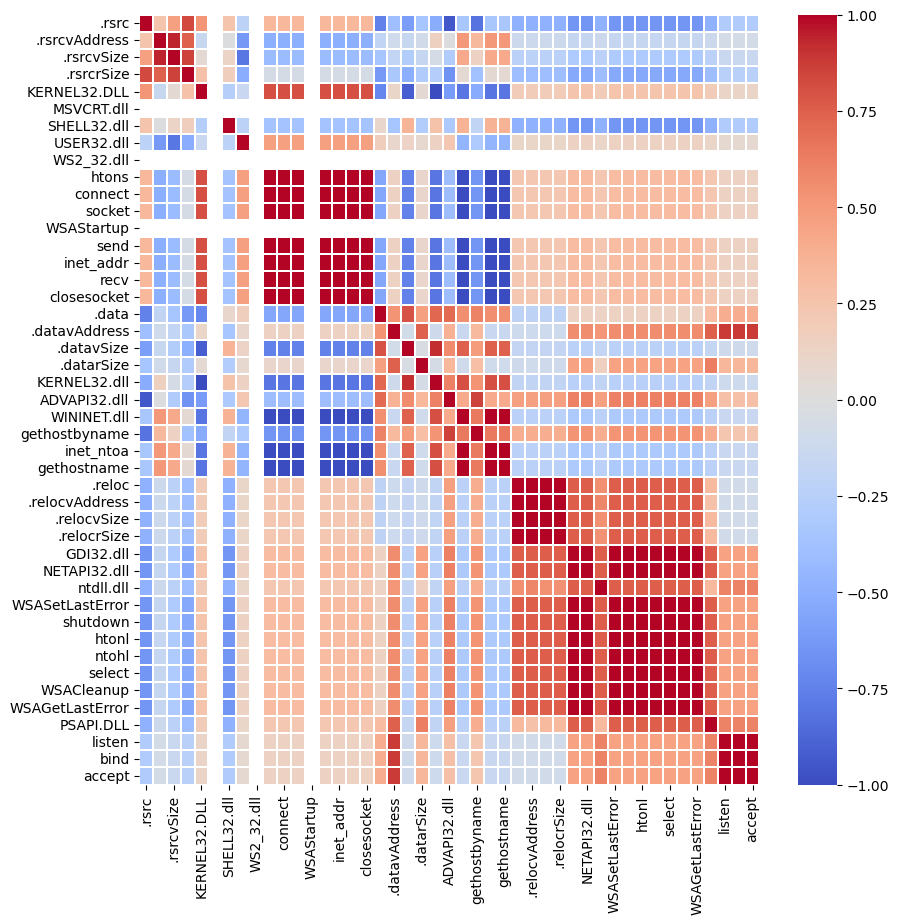

In [82]:
# make the correlation matrix
corr = df.corr()
#Visualize
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.2)
fig=plt.gcf()

In [83]:
df.dtypes

.rsrc                int64
.rsrcvAddress      float64
.rsrcvSize         float64
.rsrcrSize         float64
KERNEL32.DLL         int64
MSVCRT.dll           int64
SHELL32.dll          int64
USER32.dll           int64
WS2_32.dll           int64
htons                int64
connect              int64
socket               int64
WSAStartup           int64
send                 int64
inet_addr            int64
recv                 int64
closesocket          int64
.data                int64
.datavAddress      float64
.datavSize         float64
.datarSize         float64
KERNEL32.dll         int64
ADVAPI32.dll         int64
WININET.dll          int64
gethostbyname        int64
inet_ntoa            int64
gethostname          int64
.reloc               int64
.relocvAddress     float64
.relocvSize        float64
.relocrSize        float64
GDI32.dll            int64
NETAPI32.dll         int64
ntdll.dll            int64
WSASetLastError      int64
shutdown             int64
htonl                int64
n

In [84]:
standar = StandardScaler()
scaler_data = standar.fit_transform(df)
scaler_data

array([[ 0.77459667, -0.30495096, -0.13714523, ..., -0.22941573,
        -0.22941573, -0.22941573],
       [-1.29099445, -0.32531497, -0.60052422, ..., -0.22941573,
        -0.22941573, -0.22941573],
       [ 0.77459667, -0.30495096, -0.12219752, ..., -0.22941573,
        -0.22941573, -0.22941573],
       ...,
       [ 0.77459667, -0.30495096, -0.12219752, ..., -0.22941573,
        -0.22941573, -0.22941573],
       [-1.29099445, -0.32531497, -0.60052422, ..., -0.22941573,
        -0.22941573, -0.22941573],
       [ 0.77459667, -0.30495096, -0.10724981, ..., -0.22941573,
        -0.22941573, -0.22941573]])

### MEtodo del codo

In [85]:
kmeans = KMeans(
    init = "random",
    n_clusters = 4,
    n_init = 1,
    max_iter = 200,
    random_state = 123
)

In [86]:
kmeans.fit(scaler_data)

KMeans(init='random', max_iter=200, n_clusters=4, n_init=1, random_state=123)

In [87]:
kmeans.inertia_

322.660045419384

In [88]:
kmeans.cluster_centers_

array([[-0.53987041,  0.81877181,  0.67954324,  0.09765203, -1.31818182,
         0.        ,  0.58681566, -0.75069769,  0.        , -1.62368828,
        -1.62368828, -1.62368828,  0.        , -1.62368828, -1.62368828,
        -1.62368828, -1.62368828,  0.8922686 , -0.23097711,  1.21345414,
        -0.15528073,  1.31818182,  0.66804266,  1.62368828,  1.05131497,
         1.62368828,  1.62368828, -0.37796447, -0.37647201, -0.37796126,
        -0.37795306, -0.5       , -0.5       , -0.37796447, -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.37796447, -0.22941573, -0.22941573, -0.22941573],
       [ 0.77459667, -0.30495096, -0.12718009,  0.35805744,  0.5       ,
         0.        ,  0.18442778,  0.2847474 ,  0.        ,  0.61588176,
         0.61588176,  0.61588176,  0.        ,  0.61588176,  0.61588176,
         0.61588176,  0.61588176, -0.57735027, -0.30325425, -0.46259364,
        -0.26969811, -0.5       , -0.81649658, -0.

In [89]:
kmeans.n_iter_

3

In [97]:
y_kmeans = kmeans.predict(scaler_data)

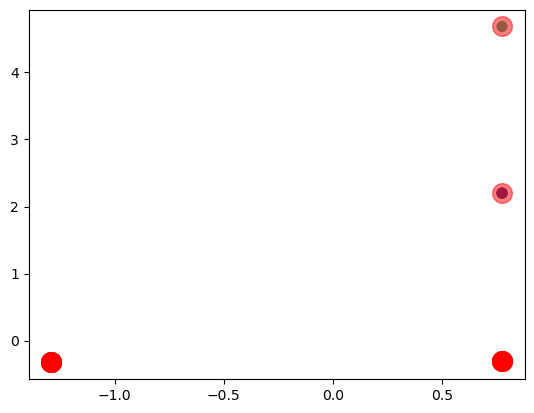

In [99]:
plt.scatter(scaler_data[:,0], scaler_data[:,1], c=y_kmeans, s=50, cmap='viridis')


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

/home/kali/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kali/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kali/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kali/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kali/.local/lib/python3.10/site-pa

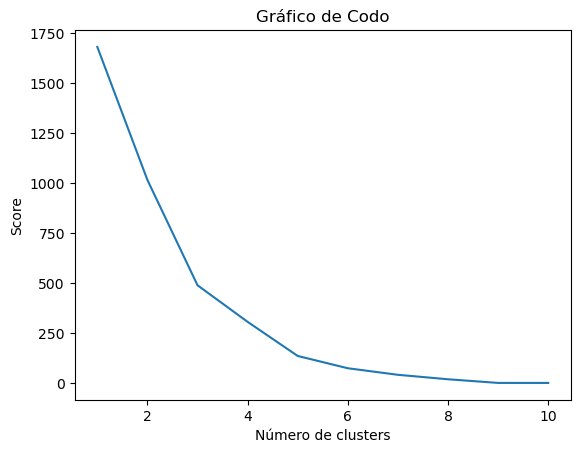

In [90]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(scaler_data)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

La grafica del codo nos permite intentar ver que cluster se adapta mejor al grupo de datos que tenemos. En este caso podemos ver que el codo se marca mas en el punto 3 y 5. Por lo tanto podemos decir que lel numero de mejor cluster aqui se encuentra en 3 y 5. Pero en este caso la grafica del codo no es muy confiable.

### Silloute

In [91]:
silh = []
kmax = 15

for k in range (2, kmax + 1):
  kmeans = KMeans(
        init = "random",
        n_clusters = k,
        n_init = 1,
        max_iter = 200,
        random_state = 123
    ).fit(scaler_data)
  etiquetas = kmeans.labels_
  silh.append(silhouette_score(scaler_data, etiquetas, metric = 'euclidean'))

silh

[0.5157201087107999,
 0.5676674285801168,
 0.7428824627953503,
 0.7570907898205611,
 0.7158247683286034,
 0.7686881160849379,
 0.8999471088456719,
 0.9468553182617618,
 0.9103683476032215,
 0.7812376015806417,
 0.7937376015806914,
 0.9249876015805174,
 0.874999877629549,
 0.85]

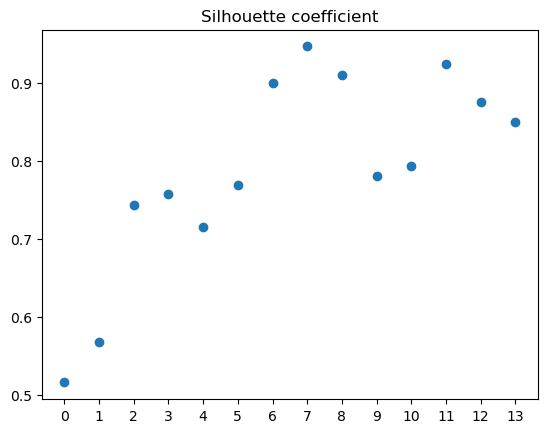

In [92]:
# do the silhouette graph
k = list(range(14))
plt.scatter(k, silh)
plt.title('Silhouette coefficient')
plt.xticks(k, k)
plt.show()

El mayor numero que podemos ver en la grafica de silhouette es el 7. Por lo tanto nos dice que existen 7 familias distintas de malwares.

### Jaccard

In [93]:
# mypath = os.getcwd()+'/MALWR'

# malware_files = [f for f in listdir(mypath)]
# # iterate through all pairs of malware
# for malware1,malware2 in itertools.combinations(malware_files,2):

#     # compute the jaccard distance for the current pair
#     jaccard_index = jaccard(df[malware1],df[malware2])

#     # if the jaccard distance is above the threshold add an edge
#     if jaccard_index > args.threshold:
#         print (malware1,malware2,jaccard_index)
#         graph.add_edge(malware1,malware2,penwidth=1+(jaccard_index-args.threshold)*10)

### DBSCAN

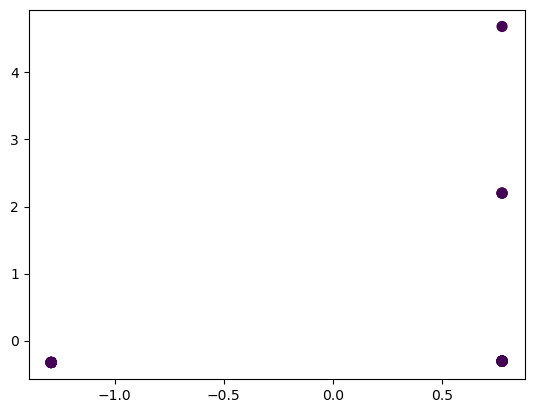

In [94]:
clusters = DBSCAN(eps = 0.5, min_samples = 50).fit(scaler_data)

plt.scatter(scaler_data[:,0], scaler_data[:,1], c=clusters.labels_, s=50, cmap='viridis')

In [95]:
clusters.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

## Conclusiones
1. ¿Para qué número de clústeres se obtiene el coeficiente de Silhouette más alto?

    **Acorde a al grafica de silhouette el coeficiente mas alto es el 7, quiere decir la cantidad de clusters que se deberia de utilizar**
2. ¿Coincide el coeficiente de Silhouette con el método del codo?
    
    **No, el coeficiente de silhouette nos da 7 pero el metodo del codo nos da un resultado entre 3 y 5.**
3. ¿Cuántas familias existen entre los ejemplares de malware proporcionados?
4. ¿Coincide el índice de Jaccard con las familias encontradas?